# Danh sách thành viên:
#### Võ Quốc Thái - 52000398
#### Nguyễn Tấn Phát - 52000583
#### Trương Thị Bích Trinh - 52000424

## 1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filename)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Kiểm tra tên của các cột
names = list(df.columns)
print(names)
# Kiểm tra loại của các cột
types = df.dtypes
print(types)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# Kết hợp tất cả dữ liệu với nhau theo một định dạng thống nhất
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])

In [7]:
data = df.drop(['customerID'], axis=1)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [9]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
print(X.shape)
print(y.shape)

(7043, 19)
(7043,)


In [10]:
# Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

In [12]:
print(X_scaler[0])
print(data.head())

[0.         0.         1.         0.         0.01388889 0.
 0.5        0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.66666667 0.11542289
 0.38361409]
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1       

In [13]:
print("Kích thước của df trước khi loại bỏ giá trị ngoại lai:", df.shape)
#Loại bỏ các giá trị ngoại lai
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
X_scaled_data = pd.DataFrame(X_scaled, columns = X.columns)

print("Kích thước của df sau khi loại bỏ giá trị ngoại lai:", data_no_outliers.shape)

Kích thước của df trước khi loại bỏ giá trị ngoại lai: (7043, 21)
Kích thước của df sau khi loại bỏ giá trị ngoại lai: (5323, 20)


In [14]:
#Kiểm tra dữ liệu đã được chuẩn hóa chính xác
print("Means dữ liệu sau khi được chuẩn hóa : ",X_test.mean(axis=0))
print("\nStds dữ liệu sau khi được chuẩn hóa : ",X_test.std(axis=0))

Means dữ liệu sau khi được chuẩn hóa :  gender                 0.477993
SeniorCitizen          0.166588
Partner                0.477993
Dependents             0.292948
tenure                32.223852
PhoneService           0.898249
MultipleLines          0.911027
InternetService        0.868434
OnlineSecurity         0.785140
OnlineBackup           0.890204
DeviceProtection       0.921439
TechSupport            0.795551
StreamingTV            0.970658
StreamingMovies        0.976337
Contract               0.680076
PaperlessBilling       0.607667
PaymentMethod          1.586370
MonthlyCharges        64.683696
TotalCharges        3218.951727
dtype: float64

Stds dữ liệu sau khi được chuẩn hóa :  gender                 0.499634
SeniorCitizen          0.372696
Partner                0.499634
Dependents             0.455223
tenure                24.751426
PhoneService           0.302392
MultipleLines          0.943798
InternetService        0.734507
OnlineSecurity         0.861215
OnlineBac

In [15]:
#Điền giá trị trung bình cho các cột bị thiếu
data.fillna(data.mean(), inplace=True)

In [16]:
#Xóa các feature có phương sai thấp
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)
print(X_train)
print(X_test)

[[1.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 7.070e+01 3.236e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 2.000e+00 8.055e+01 6.021e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.930e+01 2.241e+03]
 ...
 [1.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 2.115e+01 2.659e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.000e+00 9.945e+01 3.700e+02]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.980e+01 3.890e+03]]
[[0.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 2.480e+01 2.044e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 2.525e+01 6.522e+03]
 [0.000e+00 0.000e+00 1.000e+00 ... 3.000e+00 1.935e+01 6.700e+01]
 ...
 [1.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 6.050e+01 3.187e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 9.070e+01 1.312e+03]
 [1.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 5.110e+01 4.240e+02]]



Số lượng của các điểm dữ liệu : 5323


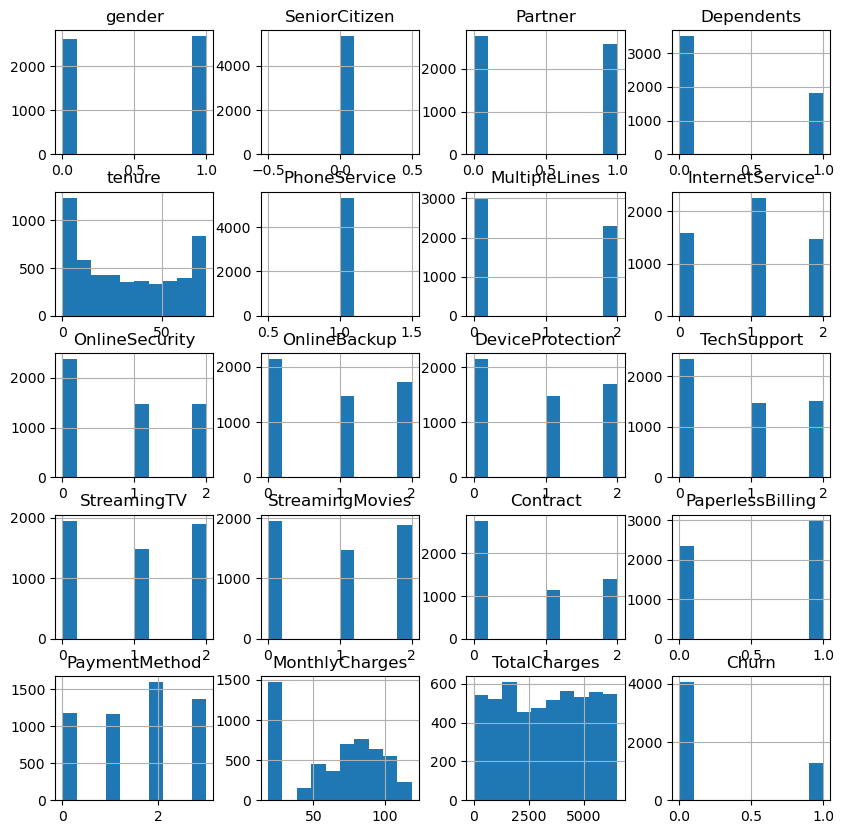

In [17]:
#Kiểm tra số lượng dữ liệu
print("\nSố lượng của các điểm dữ liệu :", len(data))
#Kiểm tra phân phối của các cột đặc trưng
import matplotlib.pyplot as plt
data.hist(figsize=(10,10))
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
ada_c = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.5)
ada_r = AdaBoostRegressor()
gradient_c = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.5, max_depth = 5)
gradient_r = GradientBoostingRegressor()
xgbo_c = xgb.XGBClassifier(n_estimators = 50, learning_rate = 0.5, max_depth = 5)
xgbo_r =xgb.XGBRegressor()


*** AdaBoostClassifier (Classification) ***
Accuracy score: 0.8008
Confusion matrix:
[[1389  150]
 [ 271  303]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



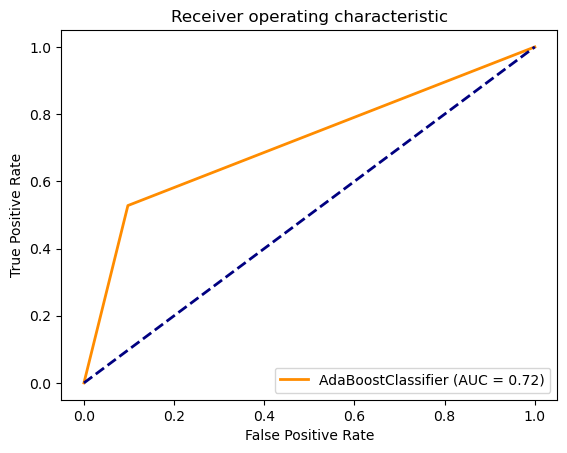


*** GradientBoostingClassifier (Classification) ***
Accuracy score: 0.7870
Confusion matrix:
[[1373  166]
 [ 284  290]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.51      0.56       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



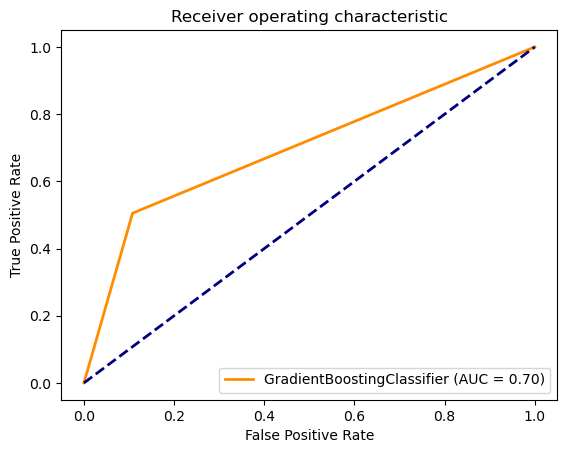


*** XGBClassifier (Classification) ***
Accuracy score: 0.7709
Confusion matrix:
[[1351  188]
 [ 296  278]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.60      0.48      0.53       574

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



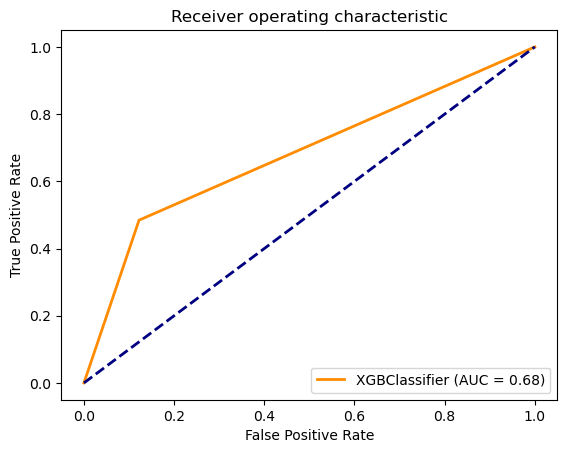


*** AdaBoostRegressor (Regression) ***
R2 score: 0.2552
Mean squared error: 0.1474
Mean absolute error: 0.3188
Root Mean squared error: 0.3839

*** GradientBoostingRegressor (Regression) ***
R2 score: 0.3341
Mean squared error: 0.1318
Mean absolute error: 0.2699
Root Mean squared error: 0.3630

*** XGBRegressor (Regression) ***
R2 score: 0.2063
Mean squared error: 0.1570
Mean absolute error: 0.2822
Root Mean squared error: 0.3963


In [32]:
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import os 
from scipy import stats
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  precision_recall_curve
import numpy as n

# Khởi tạo biến lưu giá trị AUC hoặc R2 score cho từng mô hình
auc_scores = []
r2_scores = []
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])
# Huấn luyện và đánh giá mô hình
for model in [ada_c, gradient_c, xgbo_c, ada_r, gradient_r, xgbo_r]:
    # Tách loại mô hình
    if model in [ada_c, gradient_c, xgbo_c]:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")
    
    # Huấn luyện mô hình trên tập train
    model.fit(X_train, y_train)
    
    # Đánh giá mô hình trên tập test
    if problem_type == "Classification": 
        y_pred = model.predict(X_test)
        print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification report:\n{classification_report(y_test, y_pred)}")

        
        # Tính AUC và lưu giá trị vào biến auc_scores
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()



        
    else: #Nếu là "Regression"
        y_pred = model.predict(X_test)
        print(f"R2 score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.4f}")
        print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: {:.4f}".format(rmse))